In [ ]:
!pip install alpha_vantage

In [4]:
from alpha_vantage.timeseries import TimeSeries
from pyspark.sql import SparkSession
import pandas as pd

In [5]:
# Initialize Spark session
spark = SparkSession.builder.appName("StockMarketAnalysis").getOrCreate()

# Alpha Vantage API setup
key = 'X8UDDLNEGA0TEEQM'  # Replace with your Alpha Vantage API key
ts = TimeSeries(key)
data, meta_data = ts.get_daily(symbol='AAPL')

In [ ]:
'''# Convert to Spark DataFrame
df = spark.createDataFrame(pd.DataFrame(data).T)
df.show()

# Analysis example: Calculate moving average
from pyspark.sql.window import Window
from pyspark.sql import functions as F

windowSpec = Window.orderBy("date").rowsBetween(-5, 0)
df = df.withColumn("moving_avg", F.avg("close").over(windowSpec))
df.show()'''


In [25]:
#Load the data into a pandas dataframe
pandas_df = pd.DataFrame(data).T

In [30]:
pandas_df.head()

,1. open,2. high,3. low,4. close,5. volume
2023-12-01,190.3300,191.5600,189.2300,191.2400,45704823
2023-11-30,189.8400,190.3200,188.1900,189.9500,48794366
2023-11-29,190.9000,192.0900,188.9700,189.3700,43014224
2023-11-28,189.7800,191.0800,189.4000,190.4000,38415419
2023-11-27,189.9200,190.6700,188.9000,189.7900,40552609


In [54]:
spark = SparkSession.builder \
        .appName("StockMarketAnalysis") \
        .config("spark.some.config.option", "some-value") \
        .config("spark.driver.memory", "4g") \
        .getOrCreate()

In [52]:
import os
os.environ["SPARK_HOME"] = "C:\\spark"
os.environ["PYSPARK_PYTHON"] = "C:\\Users\\aubhi\\anaconda3\\python.exe"
os.environ["HADOOP_HOME"] = "C:\\hadoop"
PYTHONUNBUFFERED = 1

In [41]:
# Set the environment variables for Hadoop
#os.environ["HADOOP_HOME"] = "C:\\hadoop"
os.environ["PATH"] = os.environ["PATH"] + ";" + os.environ["HADOOP_HOME"] + "\\bin"

In [43]:
# Replace the below path with the actual path to your Java installation
java_home_path = "C:\\Java\\jre-1.8"
os.environ["JAVA_HOME"] = java_home_path

In [44]:
!hadoop version

Hadoop 3.2.4
Source code repository Unknown -r 7e5d9983b388e372fe640f21f048f2f2ae6e9eba
Compiled by ubuntu on 2022-07-12T11:58Z
Compiled with protoc 2.5.0
From source with checksum ee031c16fe785bbb35252c749418712
This command was run using /C:/hadoop/share/hadoop/common/hadoop-common-3.2.4.jar


In [59]:
!java -version

java version "1.8.0_381"
Java(TM) SE Runtime Environment (build 1.8.0_381-b09)
Java HotSpot(TM) 64-Bit Server VM (build 25.381-b09, mixed mode)


In [20]:
!spark-submit --version

Welcome to
      ____              __
     / __/__  ___ _____/ /__
    _\ \/ _ \/ _ `/ __/  '_/
   /___/ .__/\_,_/_/ /_/\_\   version 3.5.0
      /_/
                        
Using Scala version 2.12.18, Java HotSpot(TM) 64-Bit Server VM, 1.8.0_381
Branch HEAD
Compiled by user ubuntu on 2023-09-09T01:53:20Z
Revision ce5ddad990373636e94071e7cef2f31021add07b
Url https://github.com/apache/spark
Type --help for more information.


In [57]:
#pandas_df.to_csv("temp_df.csv", index=False)
#df = spark.read.csv("temp_df.csv", header=True, inferSchema=True)

In [76]:
#rename pandas_df index to date
pandas_df.index.name = 'date'
pandas_df.head()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2023-12-01,190.3300,191.5600,189.2300,191.2400,45704823
2023-11-30,189.8400,190.3200,188.1900,189.9500,48794366
2023-11-29,190.9000,192.0900,188.9700,189.3700,43014224
2023-11-28,189.7800,191.0800,189.4000,190.4000,38415419
2023-11-27,189.9200,190.6700,188.9000,189.7900,40552609


In [77]:
# remove index assignemtnt
pandas_df.reset_index(inplace=True)
pandas_df.head()

,date,1. open,2. high,3. low,4. close,5. volume
0,2023-12-01,190.3300,191.5600,189.2300,191.2400,45704823
1,2023-11-30,189.8400,190.3200,188.1900,189.9500,48794366
2,2023-11-29,190.9000,192.0900,188.9700,189.3700,43014224
3,2023-11-28,189.7800,191.0800,189.4000,190.4000,38415419
4,2023-11-27,189.9200,190.6700,188.9000,189.7900,40552609


In [78]:
spark.stop()  # Stop the existing SparkSession
spark = SparkSession.builder.appName("YourAppName").getOrCreate()

In [86]:
# Convert Pandas DataFrame to Spark DataFrame
df = spark.createDataFrame(pandas_df)
df.show()

+----------+--------+--------+--------+--------+---------+
|      date| 1. open| 2. high|  3. low|4. close|5. volume|
+----------+--------+--------+--------+--------+---------+
|2023-12-01|190.3300|191.5600|189.2300|191.2400| 45704823|
|2023-11-30|189.8400|190.3200|188.1900|189.9500| 48794366|
|2023-11-29|190.9000|192.0900|188.9700|189.3700| 43014224|
|2023-11-28|189.7800|191.0800|189.4000|190.4000| 38415419|
|2023-11-27|189.9200|190.6700|188.9000|189.7900| 40552609|
|2023-11-24|190.8700|190.9000|189.2500|189.9700| 24048344|
|2023-11-22|191.4900|192.9300|190.8250|191.3100| 39630011|
|2023-11-21|191.4100|191.5200|189.7400|190.6400| 38134485|
|2023-11-20|189.8900|191.9050|189.8800|191.4500| 46538614|
|2023-11-17|190.2500|190.3800|188.5700|189.6900| 50941404|
|2023-11-16|189.5700|190.9600|188.6500|189.7100| 54412915|
|2023-11-15|187.8450|189.5000|187.7800|188.0100| 53790499|
|2023-11-14|187.7000|188.1100|186.3000|187.4400| 60108378|
|2023-11-13|185.8200|186.0300|184.2100|184.8000| 4362751

In [87]:
from pyspark.sql.window import Window
from pyspark.sql import functions as F

# Define the window specification
windowSpec = Window.orderBy("date").rowsBetween(-5, 0)

In [88]:
from pyspark.sql.functions import col

# Iterate over DataFrame columns and rename
for column in df.columns:
    new_column_name = ''.join(filter(lambda x: x.isalpha(), column))  # Remove numbers and periods
    df = df.withColumnRenamed(column, new_column_name)

# Show the renamed DataFrame
df.show()

+----------+--------+--------+--------+--------+--------+
|      date|    open|    high|     low|   close|  volume|
+----------+--------+--------+--------+--------+--------+
|2023-12-01|190.3300|191.5600|189.2300|191.2400|45704823|
|2023-11-30|189.8400|190.3200|188.1900|189.9500|48794366|
|2023-11-29|190.9000|192.0900|188.9700|189.3700|43014224|
|2023-11-28|189.7800|191.0800|189.4000|190.4000|38415419|
|2023-11-27|189.9200|190.6700|188.9000|189.7900|40552609|
|2023-11-24|190.8700|190.9000|189.2500|189.9700|24048344|
|2023-11-22|191.4900|192.9300|190.8250|191.3100|39630011|
|2023-11-21|191.4100|191.5200|189.7400|190.6400|38134485|
|2023-11-20|189.8900|191.9050|189.8800|191.4500|46538614|
|2023-11-17|190.2500|190.3800|188.5700|189.6900|50941404|
|2023-11-16|189.5700|190.9600|188.6500|189.7100|54412915|
|2023-11-15|187.8450|189.5000|187.7800|188.0100|53790499|
|2023-11-14|187.7000|188.1100|186.3000|187.4400|60108378|
|2023-11-13|185.8200|186.0300|184.2100|184.8000|43627519|
|2023-11-10|18

In [89]:
df.printSchema()

root
 |-- date: string (nullable = true)
 |-- open: string (nullable = true)
 |-- high: string (nullable = true)
 |-- low: string (nullable = true)
 |-- close: string (nullable = true)
 |-- volume: string (nullable = true)



In [90]:
# change all except the first column to float
for column in df.columns[1:]:
    df = df.withColumn(column, col(column).cast("float"))
df.printSchema()

root
 |-- date: string (nullable = true)
 |-- open: float (nullable = true)
 |-- high: float (nullable = true)
 |-- low: float (nullable = true)
 |-- close: float (nullable = true)
 |-- volume: float (nullable = true)



In [91]:
# Change first column to datetime
from pyspark.sql.functions import to_date
df = df.withColumn("date", to_date("date", "yyyy-MM-dd"))
df.printSchema()

root
 |-- date: date (nullable = true)
 |-- open: float (nullable = true)
 |-- high: float (nullable = true)
 |-- low: float (nullable = true)
 |-- close: float (nullable = true)
 |-- volume: float (nullable = true)



In [92]:
df.show()

+----------+-------+-------+-------+------+-----------+
|      date|   open|   high|    low| close|     volume|
+----------+-------+-------+-------+------+-----------+
|2023-12-01| 190.33| 191.56| 189.23|191.24|4.5704824E7|
|2023-11-30| 189.84| 190.32| 188.19|189.95|4.8794368E7|
|2023-11-29|  190.9| 192.09| 188.97|189.37|4.3014224E7|
|2023-11-28| 189.78| 191.08|  189.4| 190.4| 3.841542E7|
|2023-11-27| 189.92| 190.67|  188.9|189.79|4.0552608E7|
|2023-11-24| 190.87|  190.9| 189.25|189.97|2.4048344E7|
|2023-11-22| 191.49| 192.93|190.825|191.31|3.9630012E7|
|2023-11-21| 191.41| 191.52| 189.74|190.64|3.8134484E7|
|2023-11-20| 189.89|191.905| 189.88|191.45|4.6538616E7|
|2023-11-17| 190.25| 190.38| 188.57|189.69|5.0941404E7|
|2023-11-16| 189.57| 190.96| 188.65|189.71|5.4412916E7|
|2023-11-15|187.845|  189.5| 187.78|188.01|  5.37905E7|
|2023-11-14|  187.7| 188.11|  186.3|187.44|6.0108376E7|
|2023-11-13| 185.82| 186.03| 184.21| 184.8| 4.362752E7|
|2023-11-10| 183.97|186.565| 183.53| 186.4| 6.61

In [93]:
from pyspark.sql.window import Window
from pyspark.sql import functions as F

# Calculate the moving average using the renamed 'close' column
df_2 = df.withColumn("moving_avg", F.avg("close").over(windowSpec))
df_2.show()

+----------+-------+--------+--------+-------+-----------+------------------+
|      date|   open|    high|     low|  close|     volume|        moving_avg|
+----------+-------+--------+--------+-------+-----------+------------------+
|2023-07-13|  190.5|  191.19|  189.78| 190.54|4.1342336E7| 190.5399932861328|
|2023-07-14| 190.23|191.1799|  189.63| 190.69| 4.161624E7|190.61499786376953|
|2023-07-17|  191.9|  194.32|  191.81| 193.99| 5.052016E7|191.74000040690103|
|2023-07-18| 193.35|  194.33| 192.415| 193.73|4.8353776E7|192.23749923706055|
|2023-07-19|  193.1|  198.23|  192.65|  195.1| 8.050732E7|192.81000061035155|
|2023-07-20| 195.09|  196.47| 192.495| 193.13|5.9581196E7|192.86333465576172|
|2023-07-21|  194.1|  194.97|  191.23| 191.94| 7.195168E7|193.09666951497397|
|2023-07-24| 193.41|  194.91|  192.25| 192.75|4.5505096E7|193.44000244140625|
|2023-07-25| 193.33|  194.44| 192.915| 193.62|  3.72832E7|193.37833404541016|
|2023-07-26| 193.67|  195.64|  193.32|  194.5|4.7471868E7| 193.5

<Axes: xlabel='date'>

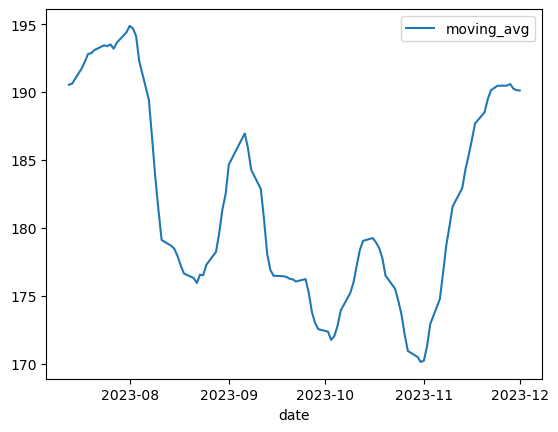

In [94]:
# Plot moving average as time series data
import matplotlib.pyplot as plt
df_2.toPandas().plot(x='date', y='moving_avg')

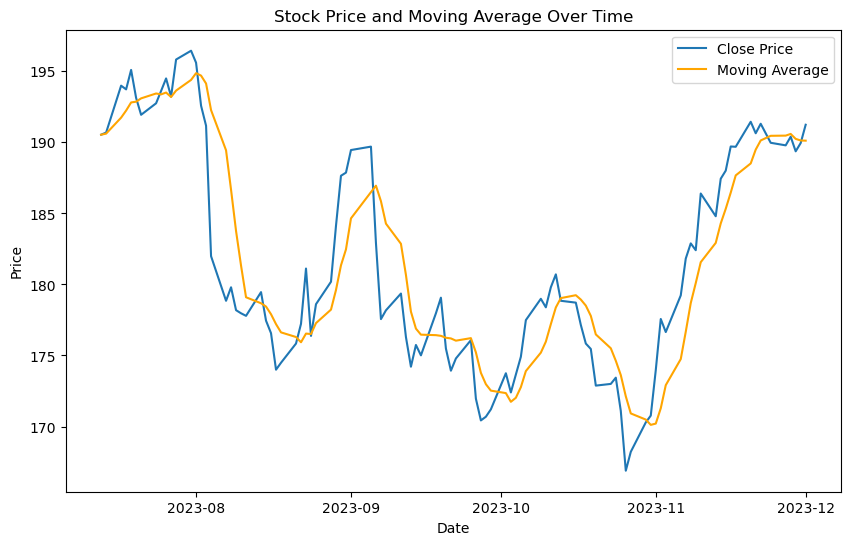

In [95]:
# Note: Ensure your Spark DataFrame isn't too large to fit into local memory
pandas_df = df_2.toPandas()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(pandas_df['date'], pandas_df['close'], label='Close Price')
plt.plot(pandas_df['date'], pandas_df['moving_avg'], label='Moving Average', color='orange')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Price and Moving Average Over Time')
plt.legend()
plt.show()

In [96]:
# Rename the DataFrame
pandas_df_2 = df_2.toPandas()

# Ensure the 'date' column is in datetime format and set as the index
pandas_df_2['date'] = pd.to_datetime(pandas_df_2['date'])
pandas_df_2.set_index('date', inplace=True)

# Selecting the 'close' column for time series analysis
time_series = pandas_df_2['close']

In [97]:
# Seasonal Decomposition
import statsmodels.api as sm

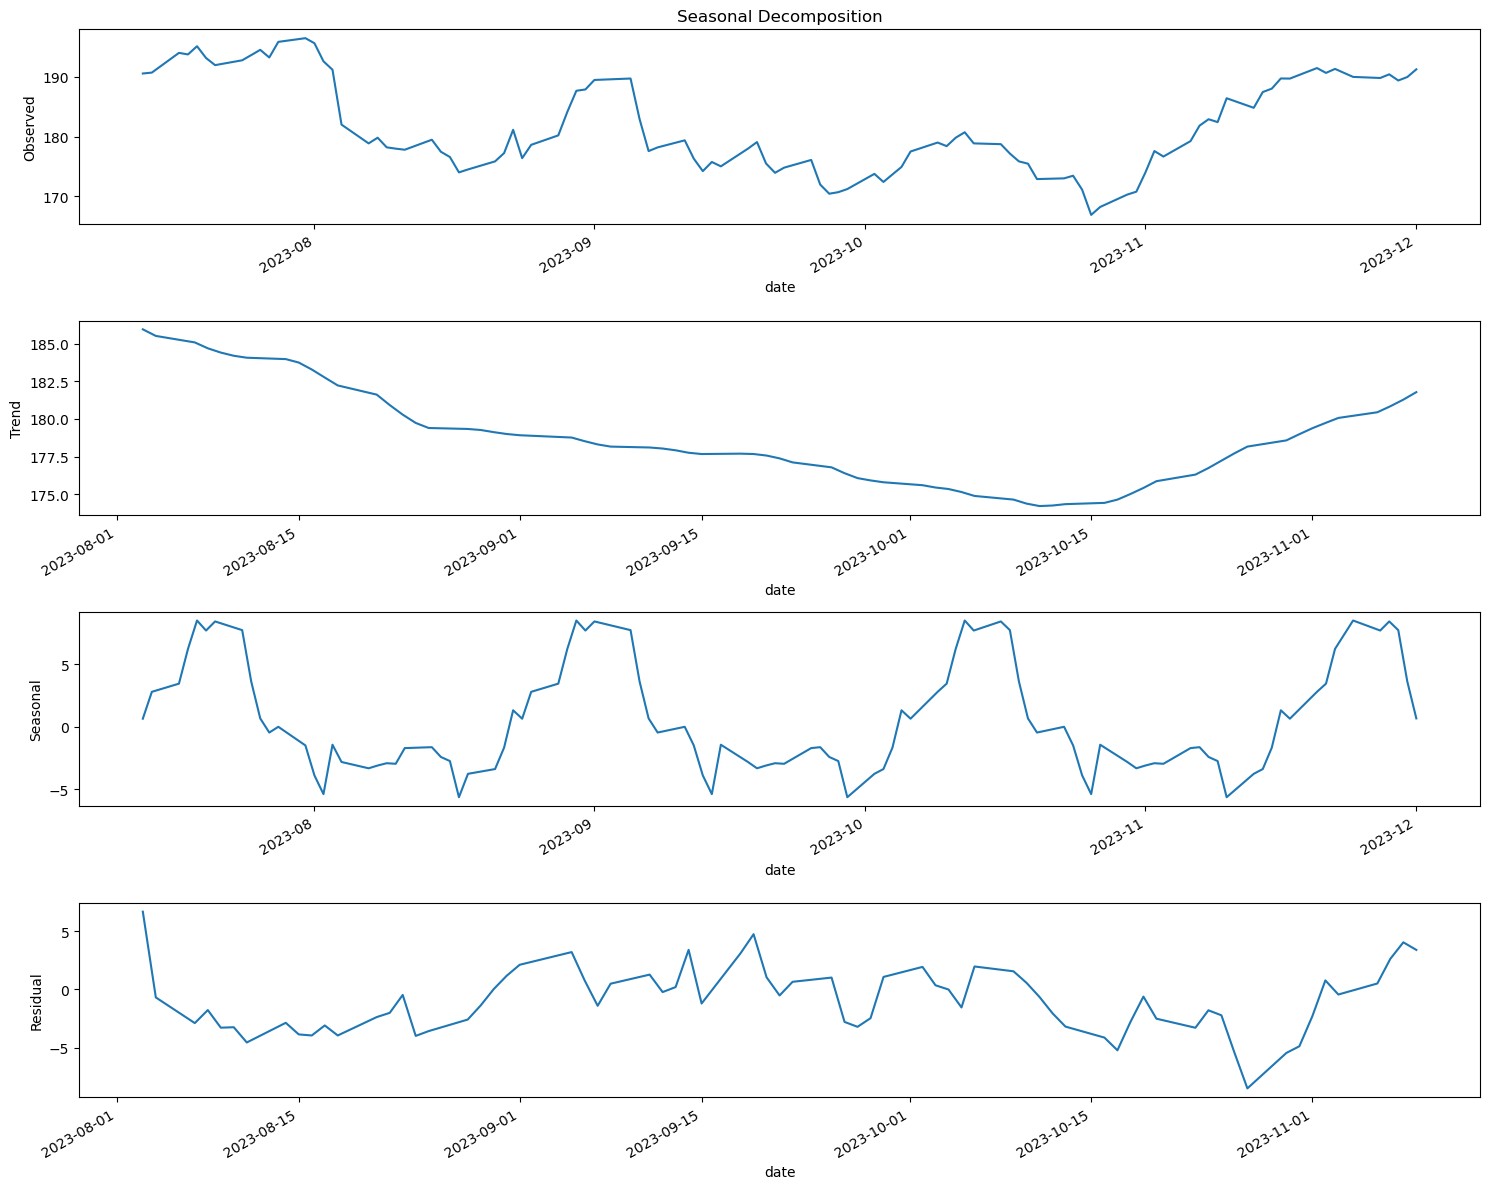

In [98]:
# Decompose the time series
# Adjust 'period' based on the expected seasonality in your data
decomposition = sm.tsa.seasonal_decompose(time_series, model='additive', period=30)

# Plotting the decomposed components
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 12))
decomposition.observed.plot(ax=ax1)
ax1.set_ylabel('Observed')
ax1.set_title('Seasonal Decomposition')

decomposition.trend.plot(ax=ax2)
ax2.set_ylabel('Trend')

decomposition.seasonal.plot(ax=ax3)
ax3.set_ylabel('Seasonal')

decomposition.resid.plot(ax=ax4)
ax4.set_ylabel('Residual')

plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

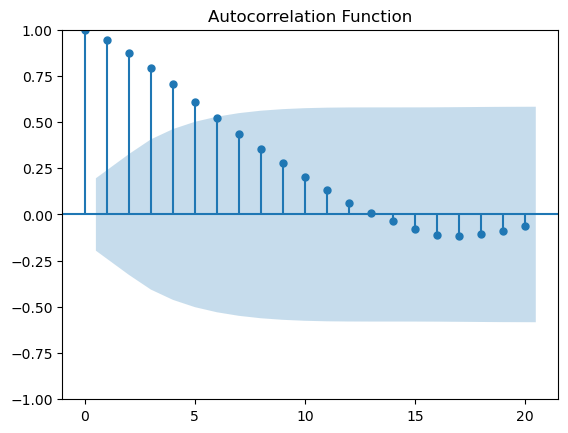

<Figure size 1200x600 with 0 Axes>

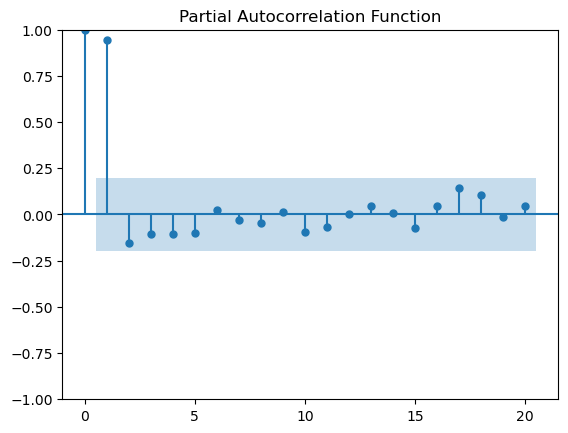

In [100]:
# Number of lags to show
lags = 20 # You can adjust this based on your specific data

# Plot ACF
plt.figure(figsize=(12, 6))
sm.graphics.tsa.plot_acf(time_series, lags=lags, alpha=0.05)
plt.title('Autocorrelation Function')
plt.show()

# Plot PACF
plt.figure(figsize=(12, 6))
sm.graphics.tsa.plot_pacf(time_series, lags=lags, alpha=0.05)
plt.title('Partial Autocorrelation Function')
plt.show()

c:\Users\aubhi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\aubhi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\aubhi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                  100
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -220.591
Date:                Sat, 02 Dec 2023   AIC                            447.182
Time:                        02:02:12   BIC                            454.967
Sample:                             0   HQIC                           450.332
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4928      0.467      1.056      0.291      -0.422       1.408
ma.L1         -0.3283      0.498     -0.660      0.509      -1.304       0.647
sigma2         5.0435      0.528      9.545      0.0

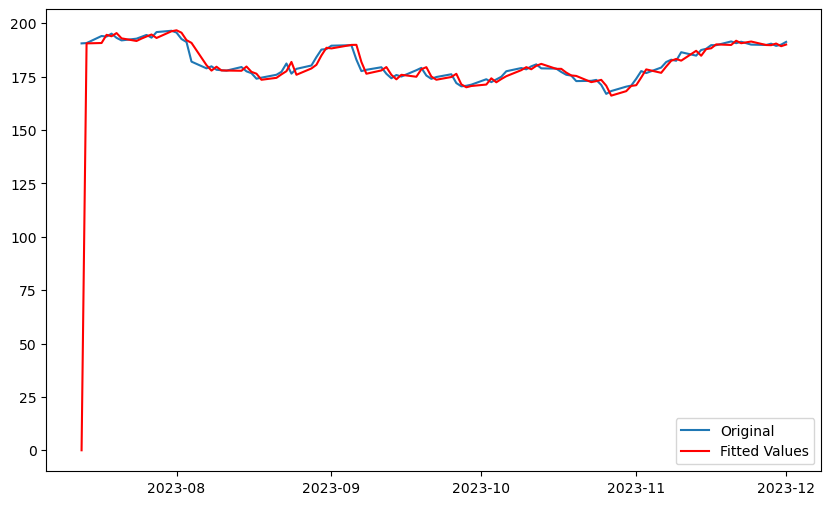

In [99]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Assuming 'time_series' is your time series data (e.g., the 'close' prices)
# Ensure time_series is a Pandas Series with the datetime index

# Fit the ARIMA model
# The parameters (1, 1, 1) are placeholders and should be adjusted
model = ARIMA(time_series, order=(1, 1, 1))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Plotting the forecast
plt.figure(figsize=(10, 6))
plt.plot(time_series, label='Original')
plt.plot(model_fit.fittedvalues, color='red', label='Fitted Values')
plt.legend()
plt.show()

c:\Users\aubhi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


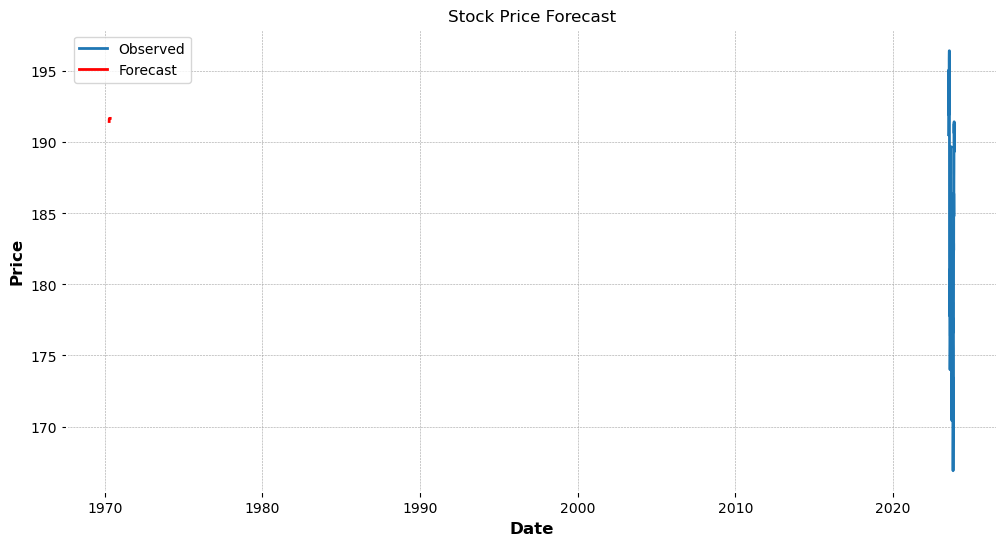

In [117]:
# ARIMA Model (parameters to be tuned)
forecast = model_fit.forecast(steps=25)  # Predict next 25 days

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(pandas_df_2['close'], label='Observed')
plt.plot(forecast, label='Forecast', color='red')
plt.title('Stock Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [102]:
from statsmodels.tsa.stattools import adfuller

In [103]:
# Perform Dickey-Fuller test:
print('Results of Dickey-Fuller Test:')
dftest = adfuller(time_series.dropna(), autolag='AIC')  # dropna() handles missing values

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)' % key] = value

print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                 -1.748619
p-value                         0.406253
#Lags Used                      1.000000
Number of Observations Used    98.000000
Critical Value (1%)            -3.498910
Critical Value (5%)            -2.891516
Critical Value (10%)           -2.582760
dtype: float64


The p values is over 0.05 meaning the series is not stationary

In [104]:
decomposition.trend

date
2023-07-13   NaN
2023-07-14   NaN
2023-07-17   NaN
2023-07-18   NaN
2023-07-19   NaN
              ..
2023-11-27   NaN
2023-11-28   NaN
2023-11-29   NaN
2023-11-30   NaN
2023-12-01   NaN
Name: trend, Length: 100, dtype: float64

In [105]:
st= decomposition.trend

In [106]:
print('Results of Dickey-Fuller Test:')
dftest_st = adfuller(st.dropna(), autolag='AIC')  # dropna() handles missing values

dfoutput_st = pd.Series(dftest_st[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in dftest_st[4].items():
    dfoutput_st['Critical Value (%s)' % key] = value

print(dfoutput_st)

Results of Dickey-Fuller Test:
Test Statistic                 -1.051447
p-value                         0.734041
#Lags Used                     10.000000
Number of Observations Used    59.000000
Critical Value (1%)            -3.546395
Critical Value (5%)            -2.911939
Critical Value (10%)           -2.593652
dtype: float64


smoothened trend value also not stationery

Volatility analysis

In [ ]:
!pip install mplfinance

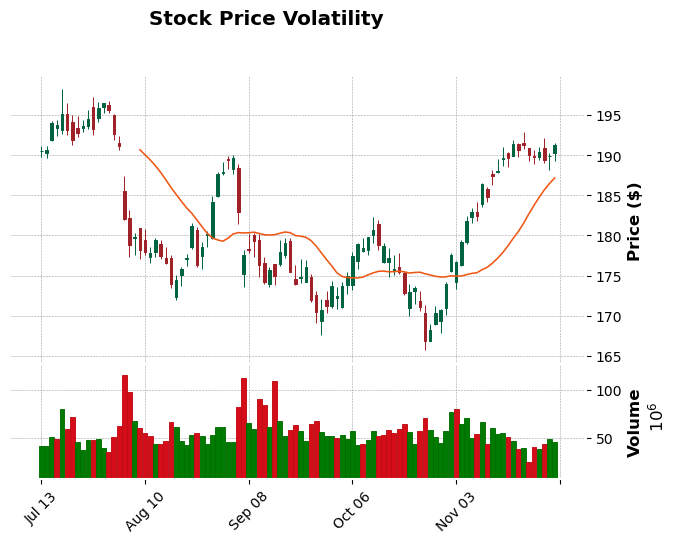

In [110]:
import mplfinance as mpf

# Assuming your dataframe 'pandas_df_2' has 'open', 'high', 'low', 'close', 'volume'
mpf.plot(pandas_df_2, type='candle', style='charles', title='Stock Price Volatility',
         ylabel='Price ($)', ylabel_lower='Volume', volume=True, mav=(20))


Rate of return analysis

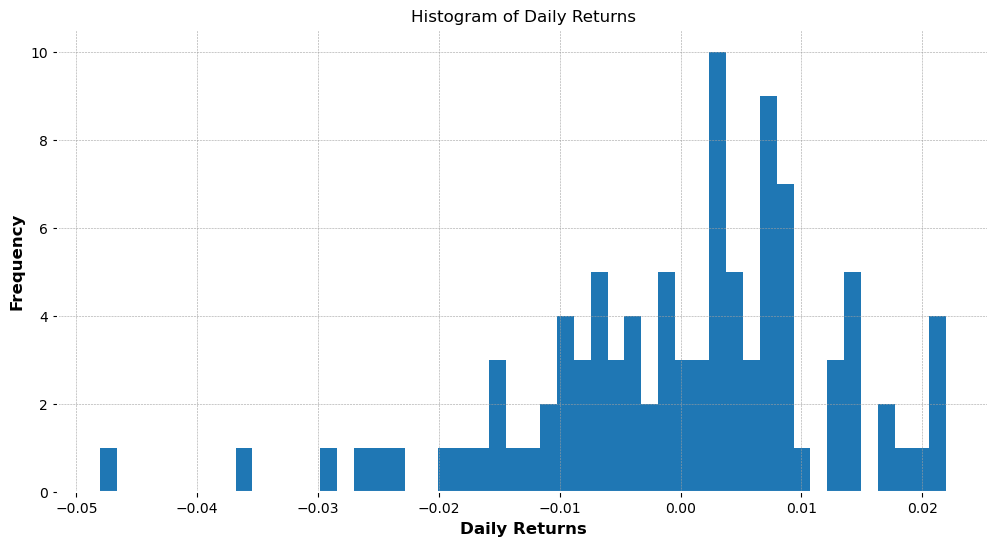

In [109]:
pandas_df_2['daily_return'] = pandas_df_2['close'].pct_change()
pandas_df_2['daily_return'].plot(kind='hist', bins=50, figsize=(12, 6))
plt.title('Histogram of Daily Returns')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.show()


Event impact analysis

ConversionError: Failed to convert value(s) to axis units: '2024-01-01'

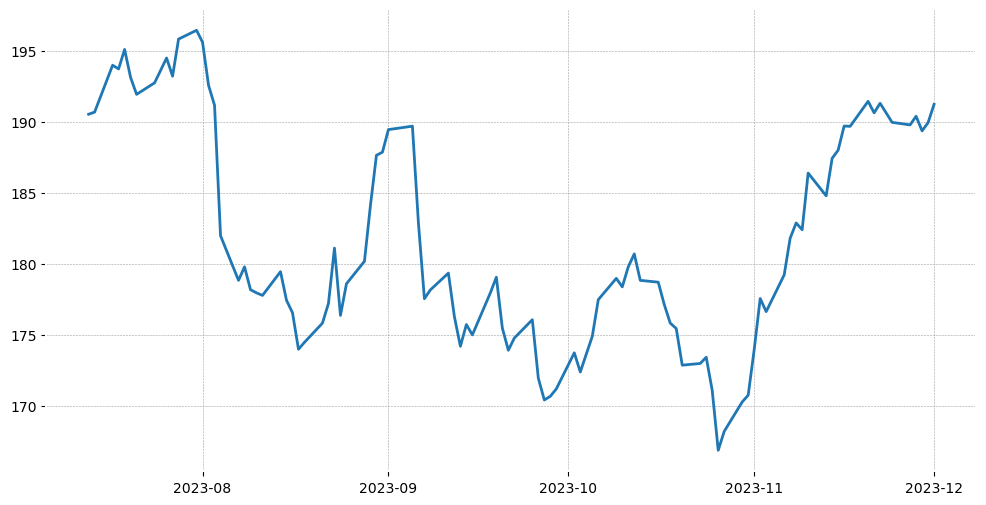

In [114]:
# Example: Marking a specific event date
event_date = '2024-01-01'  # Replace with actual date of the event
plt.figure(figsize=(12, 6))
plt.plot(pandas_df_2['close'], label='Close Price')
plt.axvline(x=event_date, color='red', linestyle='--', lw=2)
plt.annotate('Event', xy=(event_date, pandas_df_2['close'].loc[event_date]), xytext=(10, 10), textcoords='offset points')
plt.title('Stock Price around Event Date')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


Technical indicator

In [ ]:
'''import talib

# RSI
pandas_df_2['RSI'] = talib.RSI(pandas_df_2['close'].values, timeperiod=14)

# MACD
pandas_df_2['macd'], pandas_df_2['macdsignal'], pandas_df_2['macdhist'] = talib.MACD(pandas_df_2['close'].values, fastperiod=12, slowperiod=26, signalperiod=9)

# Plotting MACD
plt.figure(figsize=(12, 6))
plt.plot(pandas_df_2['macd'], label='MACD', color='red')
plt.plot(pandas_df_2['macdsignal'], label='MACD Signal', color='blue')
plt.bar(pandas_df_2.index, pandas_df_2['macdhist'] * 3, label='MACD Histogram', color='gray')
plt.legend()
plt.title('MACD Indicator')
plt.show()'''

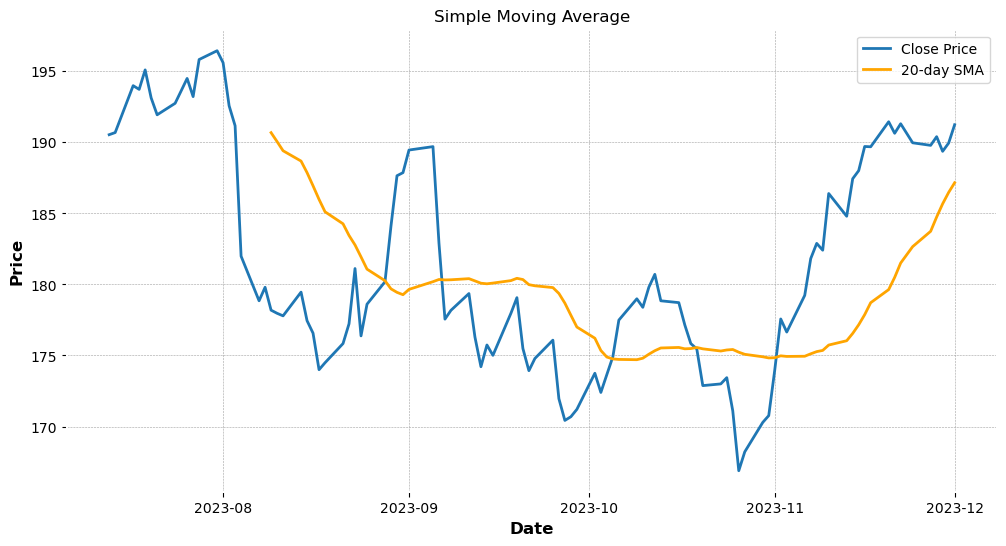

In [121]:
# Calculate the Simple Moving Average (SMA)
window_size = 20  # For a 20-day moving average
pandas_df_2['SMA'] = pandas_df_2['close'].rolling(window=window_size).mean()

# Plotting the SMA
plt.figure(figsize=(12, 6))
plt.plot(pandas_df_2['close'], label='Close Price')
plt.plot(pandas_df_2['SMA'], label='20-day SMA', color='orange')
plt.title('Simple Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

Correlation matrix

In [123]:
# seaborn import
import seaborn as sns

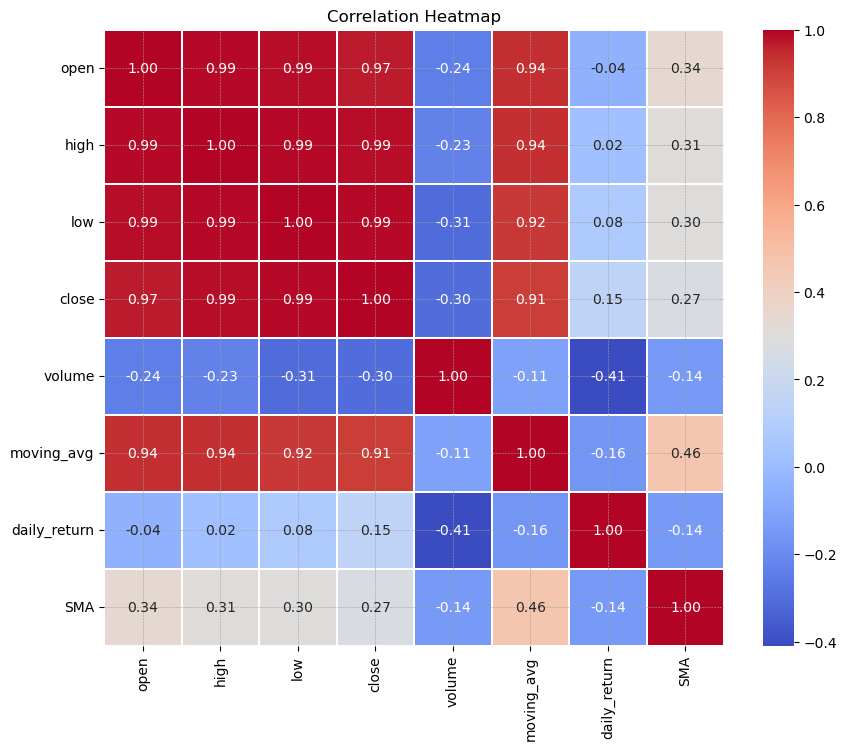

In [124]:
correlation_matrix = pandas_df_2.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.05)

# Adding title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()


Market mix/ company financial modeling

In [126]:
from alpha_vantage.fundamentaldata import FundamentalData


api_key = 'X8UDDLNEGA0TEEQM'
symbol = 'AAPL' 

fd = FundamentalData(api_key)

# Get the income statement
income_statement, _ = fd.get_income_statement_annual(symbol)
income_df = pd.DataFrame(income_statement)

# Convert to DataFrame and process as needed
income_df = income_df.T  # Transpose if necessary
income_df.reset_index(inplace=True)
income_df.rename(columns={'index': 'Date'}, inplace=True)

print(income_df.head())


               Date             0             1             2             3  \
0  fiscalDateEnding    2023-09-30    2022-09-30    2021-09-30    2020-09-30   
1  reportedCurrency           USD           USD           USD           USD   
2       grossProfit  169148000000  170782000000  152836000000  104956000000   
3      totalRevenue  379352000000  391397000000  363172000000  271642000000   
4     costOfRevenue  239069000000  248640000000  234954000000  189475000000   

              4  
0    2019-09-30  
1           USD  
2   98392000000  
3  256598000000  
4  180027000000  


In [127]:
# Fetch balance sheet data
balance_sheet_data, _ = fd.get_balance_sheet_annual(symbol)
balance_sheet_df = pd.DataFrame(balance_sheet_data)
balance_sheet_df = balance_sheet_df.T  # Transpose if necessary
balance_sheet_df.reset_index(inplace=True)
balance_sheet_df.rename(columns={'index': 'Date'}, inplace=True)
print(balance_sheet_df.head())


                                    Date             0             1  \
0                       fiscalDateEnding    2023-09-30    2022-09-30   
1                       reportedCurrency           USD           USD   
2                            totalAssets  352583000000  352755000000   
3                     totalCurrentAssets  143566000000  135405000000   
4  cashAndCashEquivalentsAtCarryingValue   29965000000   23646000000   

              2             3             4  
0    2021-09-30    2020-09-30    2019-09-30  
1           USD           USD           USD  
2  351002000000  323888000000  338516000000  
3  134836000000  143713000000  162819000000  
4   34940000000   38016000000   48844000000  


In [128]:
# Fetch income statement data
income_statement_data, _ = fd.get_income_statement_annual(symbol)
income_statement_df = pd.DataFrame(income_statement_data)
income_statement_df = income_statement_df.T  # Transpose if necessary
income_statement_df.reset_index(inplace=True)
income_statement_df.rename(columns={'index': 'Date'}, inplace=True)
print(income_statement_df.head())


               Date             0             1             2             3  \
0  fiscalDateEnding    2023-09-30    2022-09-30    2021-09-30    2020-09-30   
1  reportedCurrency           USD           USD           USD           USD   
2       grossProfit  169148000000  170782000000  152836000000  104956000000   
3      totalRevenue  379352000000  391397000000  363172000000  271642000000   
4     costOfRevenue  239069000000  248640000000  234954000000  189475000000   

              4  
0    2019-09-30  
1           USD  
2   98392000000  
3  256598000000  
4  180027000000  


In [ ]:
# Assuming that 'fiscalDateEnding' is the common date column
merged_df = pd.merge(income_df, balance_sheet_df, on='fiscalDateEnding', how='outer')
merged_df = pd.merge(merged_df, income_statement_df, on='fiscalDateEnding', how='outer')

# Convert 'fiscalDateEnding' to datetime and set it as index
merged_df['fiscalDateEnding'] = pd.to_datetime(merged_df['fiscalDateEnding'])
merged_df.set_index('fiscalDateEnding', inplace=True)

In [ ]:
# Example: Calculating the debt-to-equity ratio
merged_df['debt_to_equity'] = merged_df['totalLiabilities'] / merged_df['totalShareholderEquity']